In [1]:
#Importing pandas
import pandas as pd


In [2]:
df = pd.read_csv("diabetes.csv") # reading csv file diabetes.csv using pandas


###  Size of the dataset

In [3]:
print("Shape (rows, columns):", df.shape)
print(df.columns.tolist())

Shape (rows, columns): (768, 9)
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


###  How many features and classes are there in the dataset? 

In [4]:
print(df.head(1))
features = df.columns.drop('Outcome') # dropping Outcome column 
num_features = len(features)
print("Number of features:", num_features)
num_of_classes = df['Outcome'].nunique()
print("Number of classes:", num_of_classes)
print("Class labels:", df['Outcome'].unique())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
Number of features: 8
Number of classes: 2
Class labels: [1 0]


###  data types of the features  

In [5]:
print(df.drop(columns='Outcome').dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object


###  How do you think the missing values in the dataset have been handled?

In [6]:
import numpy as np
for col in df.columns:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: {zero_count} zeros")
valid_zero_cols = ['Pregnancies', 'Outcome'] # valid column which can have 0 as value
cols_to_replace = [col for col in df.columns if col not in valid_zero_cols]
df[cols_to_replace] = df[cols_to_replace].replace(0, np.nan)
print(df.isna().sum())
#Impute Missing Values - median imputation
df.fillna(df.median(), inplace=True)

Pregnancies: 111 zeros
Glucose: 5 zeros
BloodPressure: 35 zeros
SkinThickness: 227 zeros
Insulin: 374 zeros
BMI: 11 zeros
DiabetesPedigreeFunction: 0 zeros
Age: 0 zeros
Outcome: 500 zeros
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


### Splitting the dataset and normalization

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df.drop(columns='Outcome')
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y) # splitting the dataset with 80% for training and 20% for testing.
scaler = StandardScaler() # using stardScaler for scling the data.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
print(X_train_scaled_df.head(2))
print(X_test_scaled_df.head(2))

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.851355 -1.056427      -0.826740      -1.918187 -1.203361 -0.769477   
1     0.356576  0.144399       0.477772      -0.229874 -1.470195 -0.417498   

   DiabetesPedigreeFunction       Age  
0                  0.310794 -0.792169  
1                 -0.116439  0.561034  
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.960541  1.245157      -0.663676      -0.004766 -0.161437 -0.740145   
1     1.866489 -1.790266       2.760669      -0.680091 -1.127122  0.447785   

   DiabetesPedigreeFunction       Age  
0                 -0.555791  0.561034  
1                 -0.583061  1.153060  


### Implementing Multi-layer perceptron

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

mlp_classifier = MLPClassifier(solver='adam', max_iter=1000, random_state=42) #mlp classifier
mlp_classifier.fit(X_train_scaled_df, y_train)
y_pred = mlp_classifier.predict(X_test_scaled_df)
print("===The MLP classifier =====")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

===The MLP classifier =====
Accuracy: 0.7402597402597403
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       100
           1       0.66      0.54      0.59        54

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154



### In your code, run the Multi-layer perceptron with different values to the solver parameter. What are your observations? Do all the solvers work equally good on this dataset? If not, why

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

solvers = ['lbfgs', 'sgd', 'adam']
results = {}

for solver in solvers:
    clf = MLPClassifier(solver=solver, max_iter=1000, random_state=42)
    clf.fit(X_train_scaled_df, y_train)
    y_pred = clf.predict(X_test_scaled_df)
    acc = accuracy_score(y_test, y_pred)
    results[solver] = acc

print("Solver performance:")
for solver, acc in results.items():
    print(f"{solver}: {acc:.4f}")


Solver performance:
lbfgs: 0.6948
sgd: 0.6948
adam: 0.7403


### Vary the alpha parameter of the Multi-layer perceptron. What value range gives the optimal results for the classifier?

In [10]:
# alpha values
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10]
results = {}
for a in alphas:
    clf = MLPClassifier(solver='adam', alpha=a, max_iter=1000, random_state=42)
    clf.fit(X_train_scaled_df, y_train)
    y_pred = clf.predict(X_test_scaled_df)
    acc = accuracy_score(y_test, y_pred)
    results[a] = acc
print("Alpha performance:")
for a, acc in results.items():
    print(f"alpha={a}: accuracy={acc:.4f}")


Alpha performance:
alpha=0.0001: accuracy=0.7403
alpha=0.001: accuracy=0.7403
alpha=0.01: accuracy=0.7468
alpha=0.1: accuracy=0.7468
alpha=1: accuracy=0.7013
alpha=10: accuracy=0.6948


### SVM and logistic regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import time

#Logistic Regression
logreg = LogisticRegression(solver='liblinear')  # liblinear is good for small datasets
start = time.time()
logreg.fit(X_train_scaled, y_train)
log_reg_time = time.time() - start
logreg_pred = logreg.predict(X_test_scaled)
#SVM (RBF kernel)
svm = SVC(kernel='rbf')  
start = time.time()
svm.fit(X_train_scaled, y_train)
svm_time = time.time() - start
svm_pred = svm.predict(X_test_scaled)

#time
print(f"Logistic Regression training time: {log_reg_time:.4f} seconds")
print(f"SVM training time: {svm_time:.4f} seconds")
#Evaluation
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))

print("\n=== Support Vector Machine (SVM) ===")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))


Logistic Regression training time: 0.0010 seconds
SVM training time: 0.0097 seconds
=== Logistic Regression ===
Accuracy: 0.6948051948051948
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       100
           1       0.57      0.50      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154


=== Support Vector Machine (SVM) ===
Accuracy: 0.7402597402597403
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       100
           1       0.65      0.56      0.60        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.74      0.73       154



### Plot the correlation heatmap between the features. 

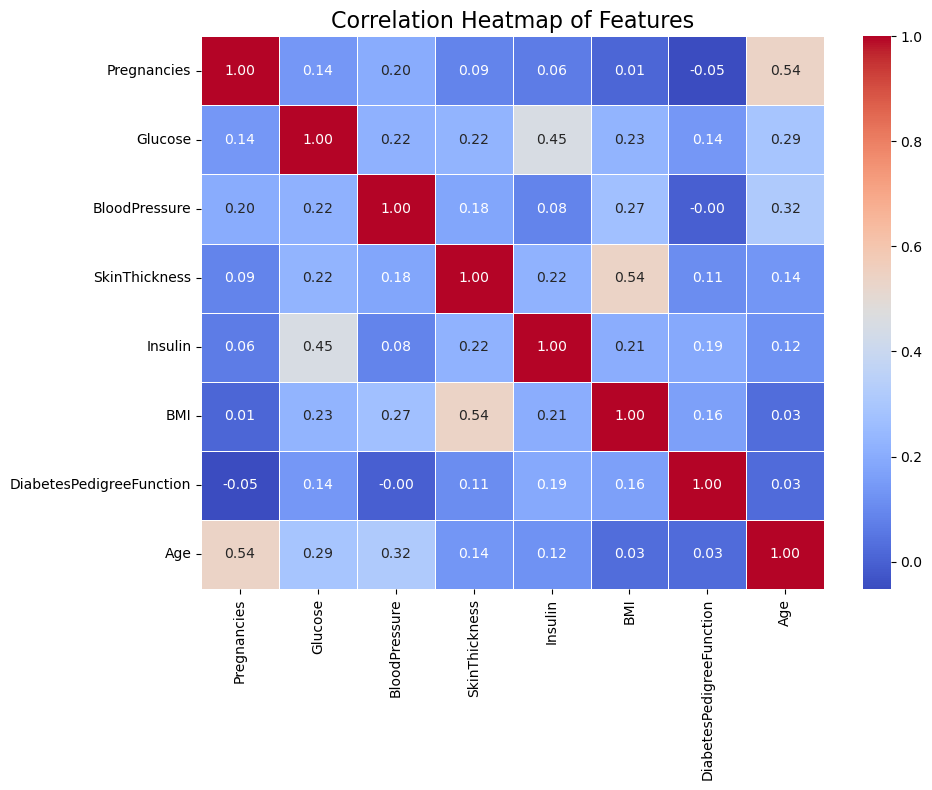

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = X_train_scaled_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Features", fontsize=16)
plt.tight_layout()
plt.show()


### Implement PCA and FLD dimensionality reduction methods and see if they have any impact on the results of the logistic regression classifier. 

In [13]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import time
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_base = log_reg.predict(X_test_scaled)
print("Baseline Accuracy (Original):", accuracy_score(y_test, y_pred_base))
# Apply PCA (retain 95% variance or choose n_components)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
# Training Logistic Regression on PCA transformed data
log_reg_pca = LogisticRegression(max_iter=1000)
log_reg_pca.fit(X_train_pca, y_train)
y_pred_pca = log_reg_pca.predict(X_test_pca)
print("PCA Accuracy:", accuracy_score(y_test, y_pred_pca))
# LDA can reduce to at most (number of classes - 1) components
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)
# Training Logistic Regression on LDA-transformed data
log_reg_lda = LogisticRegression()
log_reg_lda.fit(X_train_lda, y_train)
y_pred_lda = log_reg_lda.predict(X_test_lda)
print("LDA Accuracy:", accuracy_score(y_test, y_pred_lda))



Baseline Accuracy (Original): 0.7077922077922078
PCA Accuracy: 0.6948051948051948
LDA Accuracy: 0.7012987012987013


### Apply two feature selection techniques on the dataset and use the modified dataset to train the logistic regression classifier and report results. 
### Implementation of some simple feature selection techniques.

In [14]:
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_orig = log_reg.predict(X_test_scaled)
print("Original Accuracy:", accuracy_score(y_test, y_pred_orig))
# Scaling using MinMax for chi2
scaler_minmax = MinMaxScaler()
X_train_mm = scaler_minmax.fit_transform(X_train)
X_test_mm = scaler_minmax.transform(X_test)
# Selecting top 5 features using chi2
selector_kbest = SelectKBest(score_func=chi2, k=5)
X_train_kbest = selector_kbest.fit_transform(X_train_mm, y_train)
X_test_kbest = selector_kbest.transform(X_test_mm)
# Training logistic regression
log_kbest = LogisticRegression(max_iter=1000)
log_kbest.fit(X_train_kbest, y_train)
y_pred_kbest = log_kbest.predict(X_test_kbest)
print("Select K Best Accuracy:", accuracy_score(y_test, y_pred_kbest))
# Using L1 penalty (Lasso) for feature selection
log_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, C=0.1)
selector_model = SelectFromModel(log_l1)
selector_model.fit(X_train_scaled, y_train)
X_train_model = selector_model.transform(X_train_scaled)
X_test_model = selector_model.transform(X_test_scaled)
# Training logistic regression on selected features
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_model, y_train)
y_pred_model = log_model.predict(X_test_model)
print("Select From Model Accuracy:", accuracy_score(y_test, y_pred_model))

print("\n=== Summary ===")
print("Original:\n", classification_report(y_test, y_pred_orig))
print("Select K Best:\n", classification_report(y_test, y_pred_kbest))
print("Select From Model:\n", classification_report(y_test, y_pred_model))


Original Accuracy: 0.7077922077922078
Select K Best Accuracy: 0.7077922077922078
Select From Model Accuracy: 0.7012987012987013

=== Summary ===
Original:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154

Select K Best:
               precision    recall  f1-score   support

           0       0.75      0.83      0.79       100
           1       0.60      0.48      0.54        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.66       154
weighted avg       0.70      0.71      0.70       154

Select From Model:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.59      0.50      0.54  

### A colleague suggested that you need to identify whether one classifier is significantly better than the other.
### With the results you obtained above, do you think you can conduct a significance test? Briefly explain.

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy.stats import ttest_rel
import numpy as np
import warnings
warnings.filterwarnings('ignore')
X = df.drop(columns='Outcome')
y = df['Outcome']
# Initialize models
logreg = LogisticRegression(solver='liblinear')
svm = SVC(kernel='rbf')
mlp = MLPClassifier(solver='adam', max_iter=1000, random_state=42)
# Cross-validation setup
k = 10
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
# To store scores
logreg_scores = []
svm_scores = []
mlp_scores = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
        # Train and evaluate each model
    logreg.fit(X_train_scaled, y_train)
    svm.fit(X_train_scaled, y_train)
    mlp.fit(X_train_scaled, y_train)
    logreg_scores.append(accuracy_score(y_test, logreg.predict(X_test_scaled)))
    svm_scores.append(accuracy_score(y_test, svm.predict(X_test_scaled)))
    mlp_scores.append(accuracy_score(y_test, mlp.predict(X_test_scaled)))
# Convert to NumPy arrays for testing
logreg_scores = np.array(logreg_scores)
svm_scores = np.array(svm_scores)
mlp_scores = np.array(mlp_scores)
# Paired t-tests
print("\n=== Paired t-tests (Accuracy Comparison) ===")
t_stat_svm_mlp, p_val_svm_mlp = ttest_rel(svm_scores, mlp_scores)
print(f"SVM vs MLP: t = {t_stat_svm_mlp:.4f}, p = {p_val_svm_mlp:.4f}")
t_stat_logreg_svm, p_val_logreg_svm = ttest_rel(logreg_scores, svm_scores)
print(f"LogReg vs SVM: t = {t_stat_logreg_svm:.4f}, p = {p_val_logreg_svm:.4f}")
t_stat_logreg_mlp, p_val_logreg_mlp = ttest_rel(logreg_scores, mlp_scores)
print(f"LogReg vs MLP: t = {t_stat_logreg_mlp:.4f}, p = {p_val_logreg_mlp:.4f}")
# Optional: print mean accuracies
print("\n=== Mean Accuracies ===")
print(f"Logistic Regression: {logreg_scores.mean():.4f}")
print(f"SVM:                 {svm_scores.mean():.4f}")
print(f"MLP:                 {mlp_scores.mean():.4f}")



=== Paired t-tests (Accuracy Comparison) ===
SVM vs MLP: t = 0.7647, p = 0.4640
LogReg vs SVM: t = 1.9295, p = 0.0857
LogReg vs MLP: t = 2.2960, p = 0.0473

=== Mean Accuracies ===
Logistic Regression: 0.7668
SVM:                 0.7474
MLP:                 0.7356


### MLP classifier code generated by Claude.ai

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load data from CSV
df = pd.read_csv('diabetes.csv')
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train MLP
mlp = MLPClassifier(hidden_layer_sizes=(100,),
                    activation='tanh',
                    solver='sgd',
                    learning_rate='adaptive',
                    max_iter=500,
                    random_state=0)
mlp.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = mlp.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7662337662337663
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       157
           1       0.67      0.53      0.59        74

    accuracy                           0.77       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.76      0.77      0.76       231

